# Colab/Local Setup

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install scikit-plot

In [0]:
%tensorflow_version 1.x
#offline
#!pip install tensorflow-gpu==1.15rc3
#!pip install gdown

# Library imports and data download

In [0]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path


from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image

import tensorflow as tf

import gdown

import scikitplot as skplt
import cv2

In [0]:
basepath = Path('.')
imgpath = basepath/'data'/'image'

Note: Image Dataset (imgpath and condo_img_all.csv) not provided on Github

# Preprocessing

In [0]:
np_img_list = []
i = 0
for name in condo_img_all[0]:

    print(f'image {i}')
    img = image.load_img(imgpath/name, target_size=(64, 64))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    
    np_img_list.append(img_data.flatten())
    i += 1
        
np_img = np.array(np_img_list)

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


In [0]:
np_img.shape

(4291, 12288)

In [0]:
np_img_df = pd.DataFrame.from_records(np_img)

In [0]:
np_img_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,69.0,91.0,105.0,74.0,95.0,112.0,77.0,98.0,117.0,79.0,100.0,119.0,82.0,103.0,122.0,83.0,104.0,123.0,84.0,105.0,124.0,87.0,104.0,120.0,17.0,28.0,32.0,18.0,25.0,31.0,18.0,25.0,33.0,21.0,28.0,36.0,27.0,33.0,45.0,41.0,...,92.0,21.0,67.0,91.0,28.0,75.0,101.0,39.0,85.0,108.0,32.0,73.0,91.0,34.0,76.0,98.0,31.0,73.0,95.0,35.0,77.0,99.0,28.0,70.0,94.0,23.0,64.0,86.0,36.0,77.0,95.0,36.0,77.0,97.0,29.0,70.0,92.0,30.0,75.0,96.0
1,182.0,166.0,151.0,182.0,166.0,150.0,182.0,169.0,152.0,182.0,169.0,152.0,182.0,169.0,152.0,183.0,170.0,154.0,182.0,168.0,155.0,185.0,171.0,158.0,185.0,171.0,158.0,185.0,171.0,158.0,186.0,172.0,159.0,189.0,173.0,160.0,188.0,172.0,159.0,189.0,...,133.0,138.0,130.0,128.0,149.0,140.0,141.0,154.0,148.0,150.0,116.0,106.0,107.0,128.0,120.0,118.0,116.0,106.0,104.0,150.0,139.0,143.0,188.0,187.0,201.0,218.0,216.0,238.0,220.0,221.0,242.0,227.0,225.0,247.0,229.0,227.0,249.0,237.0,234.0,251.0
2,159.0,148.0,162.0,159.0,148.0,156.0,216.0,206.0,204.0,91.0,79.0,79.0,65.0,51.0,51.0,118.0,100.0,98.0,159.0,140.0,133.0,170.0,155.0,150.0,177.0,171.0,173.0,206.0,192.0,209.0,59.0,51.0,49.0,163.0,155.0,142.0,51.0,44.0,34.0,109.0,...,27.0,42.0,32.0,30.0,36.0,26.0,24.0,24.0,14.0,13.0,34.0,26.0,24.0,28.0,20.0,18.0,26.0,18.0,16.0,24.0,16.0,14.0,24.0,16.0,14.0,27.0,17.0,15.0,26.0,16.0,14.0,27.0,16.0,14.0,36.0,25.0,23.0,46.0,36.0,34.0
3,188.0,174.0,129.0,201.0,184.0,140.0,207.0,189.0,149.0,209.0,201.0,165.0,210.0,206.0,171.0,208.0,202.0,170.0,200.0,196.0,169.0,203.0,196.0,168.0,204.0,197.0,171.0,122.0,105.0,79.0,153.0,136.0,106.0,162.0,145.0,115.0,164.0,150.0,121.0,167.0,...,59.0,182.0,130.0,83.0,164.0,115.0,75.0,147.0,97.0,60.0,142.0,89.0,55.0,143.0,90.0,56.0,119.0,67.0,30.0,152.0,96.0,59.0,171.0,110.0,63.0,154.0,96.0,58.0,216.0,206.0,197.0,213.0,200.0,191.0,211.0,198.0,192.0,210.0,200.0,191.0
4,146.0,97.0,39.0,157.0,108.0,50.0,178.0,129.0,62.0,194.0,140.0,68.0,204.0,150.0,76.0,210.0,153.0,72.0,222.0,166.0,83.0,214.0,163.0,80.0,206.0,150.0,76.0,194.0,140.0,68.0,202.0,148.0,76.0,198.0,145.0,67.0,183.0,129.0,59.0,163.0,...,13.0,242.0,211.0,144.0,237.0,197.0,127.0,237.0,195.0,123.0,240.0,197.0,129.0,240.0,200.0,128.0,242.0,202.0,130.0,239.0,195.0,124.0,235.0,198.0,130.0,235.0,197.0,132.0,226.0,193.0,140.0,224.0,194.0,142.0,128.0,101.0,72.0,185.0,177.0,156.0


In [0]:
from sklearn.model_selection import train_test_split

# Train Model

In [0]:
np_img_train, np_img_test = train_test_split(np_img_df, test_size=0.2)

In [0]:
np_img_train = np_img_train / 255
np_img_test = np_img_test / 255

In [0]:
np_img_train.shape, np_img_test.shape

((3432, 12288), (859, 12288))

In [0]:
m = Sequential()
m.add(Dense(1024,  activation='relu', input_shape=(np_img_train.shape[1],)))
m.add(Dense(512,  activation='relu'))
m.add(Dense(256,  activation='relu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(256,  activation='relu'))
m.add(Dense(512,  activation='relu'))
m.add(Dense(1024,  activation='relu'))
m.add(Dense(np_img_train.shape[1],  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = 'adam')
history = m.fit(np_img_train, np_img_train, batch_size=128, epochs=10, verbose=1, 
                validation_data=(np_img_test, np_img_test))

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(np_img_train)  # bottleneck representation
Venc = encoder.predict(np_img_test)   # test set

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 3432 samples, validate on 859 samples
Epoch 1/10
3432/3432 [==============================] - 7s 2ms/sample - loss: 0.0682 - val_loss: 0.0641
Epoch 2/10
3432/3432 [==============================] - 3s 906us/sample - loss: 0.0629 - val_loss: 0.0609
Epoch 3/10
3432/3432 [==============================] - 3s 909us/sample - loss: 0.0606 - val_loss: 0.0593
Epoch 4/10
3432/3432 [==============================] - 3s 895us/sample - loss: 0.0584 - val_loss: 0.0581
Epoch 5/10
3432/3432 [==============================] - 3s 910us/sample - loss: 0.0572 - val_loss: 0.0554
Epoch 6/10
3432/3432 [==============================] - 3s 910us/sample - loss: 0.0559 - val_loss: 0.0543
Epoch 7/10
3432/3432 [==============================] - 3s 897us/sample - loss: 0.0541 - val_loss: 0.0513
Epoch 8/10
3432/3432 [==============================] - 3s 911us/sample - loss: 0.0514 - val_loss: 0.0513
Epoch 9/10
3432/3432 [====

In [0]:
Zenc.shape, Venc.shape

((3432, 2), (859, 2))

In [0]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

For n_clusters = 2, silhouette score is 0.39618033170700073
For n_clusters = 3, silhouette score is 0.34261706471443176
For n_clusters = 4, silhouette score is 0.3481419086456299
For n_clusters = 5, silhouette score is 0.3255767822265625
For n_clusters = 6, silhouette score is 0.31486976146698
For n_clusters = 7, silhouette score is 0.3245468735694885
For n_clusters = 8, silhouette score is 0.3238777816295624
For n_clusters = 9, silhouette score is 0.3252396285533905
For n_clusters = 10, silhouette score is 0.3213314712047577


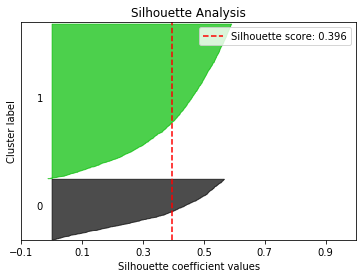

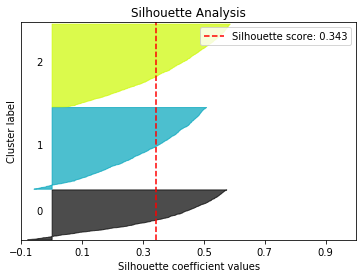

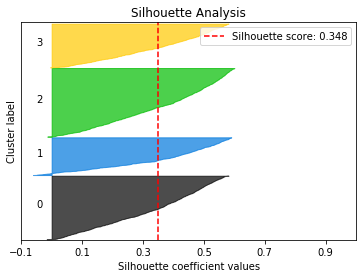

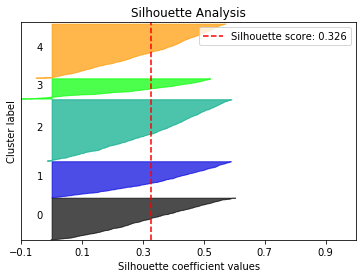

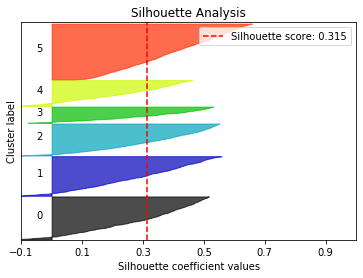

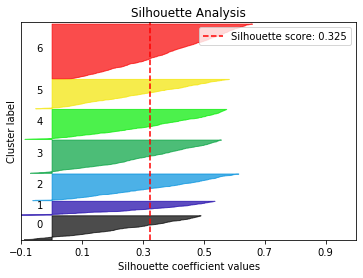

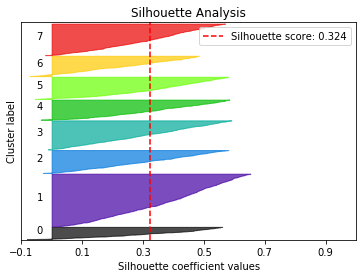

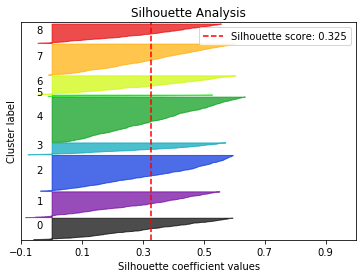

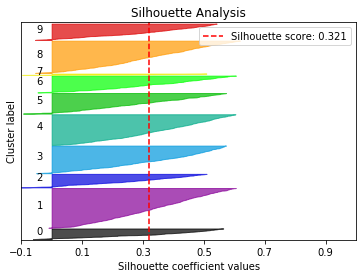

In [0]:
clusters = []
for i in range(2,11):
    clust = KMeans(n_clusters=i, random_state=42)
    preds = clust.fit_predict(Zenc)

    score = silhouette_score (Zenc, preds, metric='euclidean')
    print (f'For n_clusters = {i}, silhouette score is {score}')
    skplt.metrics.plot_silhouette(Zenc, preds)
    clusters.append(clust)

In [0]:
print(clusters[5].cluster_centers_)

[[  2.1575325  -4.363636 ]
 [ 11.151601   -6.2837825]
 [  6.6444826  -5.9344764]
 [  2.3049536 -10.952339 ]
 [ -0.8971586  -7.6023936]
 [  5.7168427  -9.62271  ]
 [  2.933409   -7.6202364]]


In [0]:
devpred = clusters[5].predict(Zenc)

dev = np_img_train.copy()

dev['cluster'] = devpred

print("\nCluster proportion for dev set:")
print(dev.groupby('cluster').size()/dev.shape[0])


Cluster proportion for dev set:
cluster
0    0.113054
1    0.065268
2    0.126166
3    0.157051
4    0.141900
5    0.138695
6    0.257867
dtype: float64


In [0]:
validpred = clusters[5].predict(Venc)

valid = np_img_test.copy()

valid['cluster'] = validpred
print("\nCluster proportion for validation set:")
print(valid.groupby('cluster').size()/valid.shape[0])


Cluster proportion for validation set:
cluster
0    0.129220
1    0.055879
2    0.136205
3    0.161816
4    0.114086
5    0.128056
6    0.274738
dtype: float64


# Display samples and save models

Note: Cluster assignments might change and differ from original saved model. Please refer to testing script to see outputs from saved models

In [0]:
def plot_images(nrows, ncols, img_path_series, title):
    # settings
    nrows, ncols = 3, 3  # array of sub-plots
    figsize = [8, 8]     # figure size, inches

    # prep (x,y) for extra plotting on selected sub-plots
    xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    ys = np.abs(np.sin(xs))           # absolute of sine

    # create figure (fig), and array of axes (ax)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.suptitle(title)
    
    # plot simple raster image on each sub-plot
    for i, axi in enumerate(ax.flat):
        # i runs from 0 to (nrows*ncols-1)
        # axi is equivalent with ax[rowid][colid]
        tmp = cv2.imread(str(imgpath/img_path_series[i]))
        axi.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))
        label = img_path_series[i]
        label = label[:15] + (label[15:] and '..')

    plt.tight_layout(True)
    plt.show()

In [0]:
for i in range(7):
    idx = dev[dev['cluster'] == i].index

    c = condo_img_all.iloc[idx]

    c_paths = c[0].unique()
    shuffled = c_paths[np.random.permutation(c_paths.shape[0])]
    plot_images(3, 3, shuffled, 'cluster ' + str(i))

In [0]:
encoder.save('encoder_v2.h5')

In [0]:
import pickle
kmeans_model = clusters[5]
kmeans_file = 'kmeans_v2.pkl'
pickle.dump(kmeans_model, open(kmeans_file, 'wb'))